<a href="https://colab.research.google.com/github/Debabarata308/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Copy_of_Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data
netflix_df=pd.read_csv("/content/drive/MyDrive/Capstone Project_4/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Making two copies of the dataset

# df1 is used in preprocessing of clustring
df1=netflix_df.copy()

# df2 is used to check the predicted output
df2=netflix_df.copy()

In [5]:
# First look of the dataset
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [6]:
# Checking the shape of the dataframe
netflix_df.shape

(7787, 12)

In [7]:
# Columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**The dataset has 7787 rows and 12 columns:**

show_id: unique id of each show (not much of a use for us in this notebook)

type: The category of a show, can be either a Movie or a TV Show

title: Name of the show

director: Name of the director(s) of the show

cast: Name of actors and other cast of the show

country: Name of countries the show is available to watch on Netflix

date_added: Date when the show was added on Netflix

release_year: Release year of the show

rating: Show rating on netflix

duration: Time duration of the show

listed_in: Genre of the show

description: Some text describing the show

# **Data Wrangling**

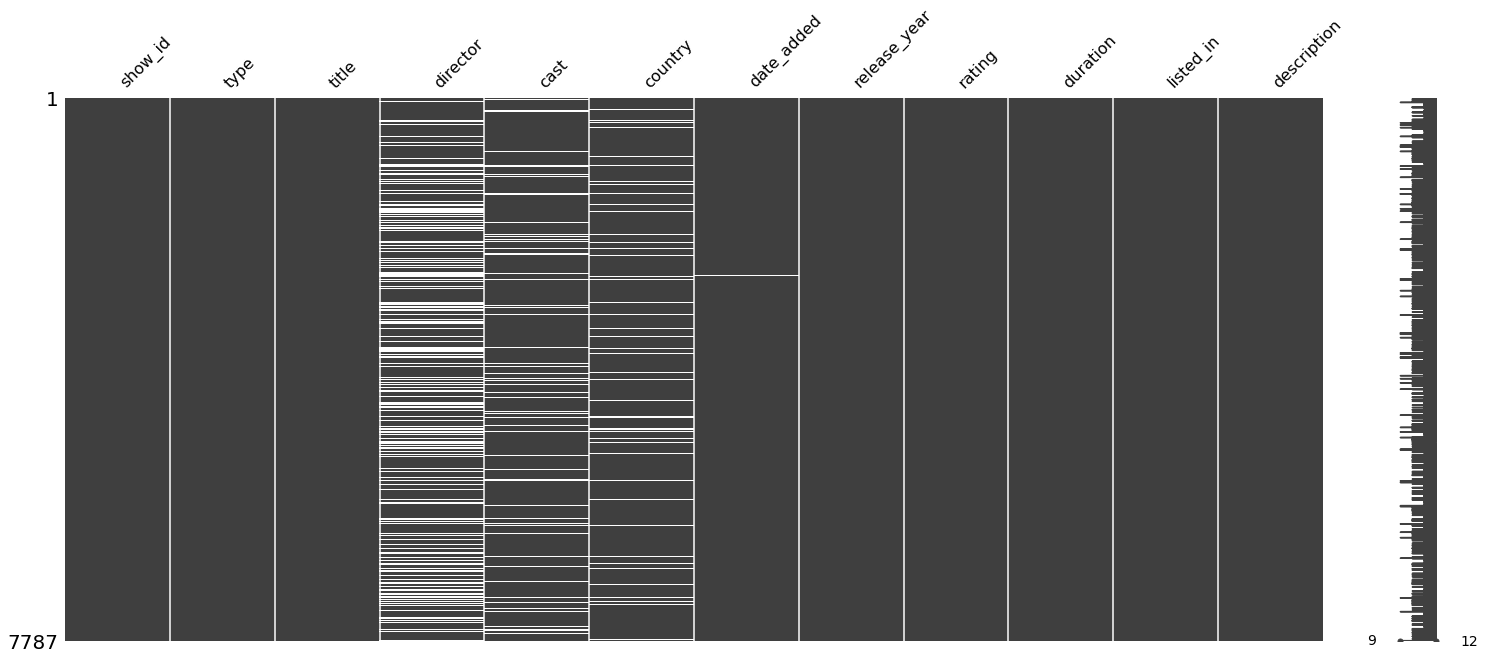

In [10]:
# Visualize missing values as a matrix
msno.matrix(netflix_df)

Using this matrix you can very quickly find the pattern of missingness in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

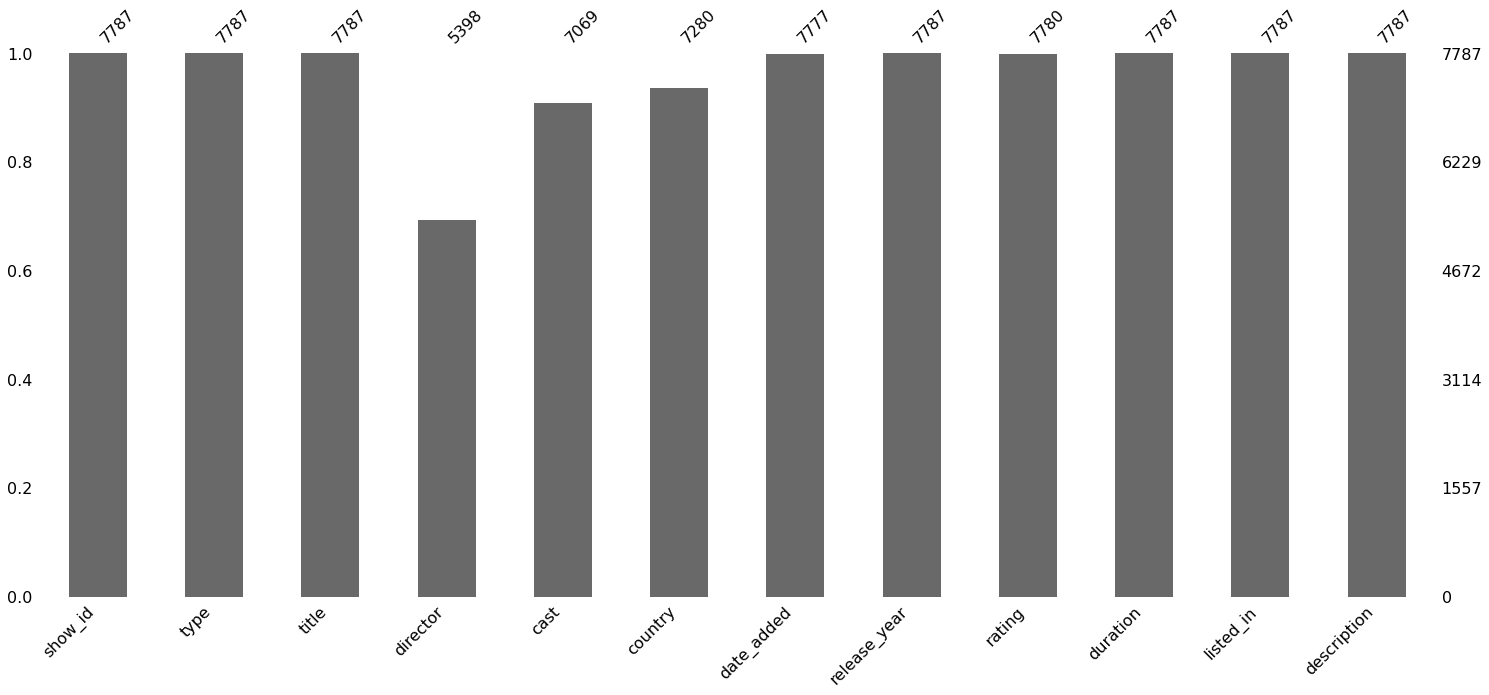

In [11]:
msno.bar(netflix_df);

This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

Finding the null values.

In [12]:
#Summing the values to get the null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
# Here we check the duplicate observtions in our dataset
duplicate = netflix_df[netflix_df.duplicated()]

In [14]:
# Printing the duplicate observations
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Duplicate Rows :


show_id	 type 	title 	director	cast	country 	date_added 	release_year	rating	duration	listed_in 	**description**

### **Observation:**
Our dataset does not contain any duplicate observations.

In [15]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_rate > 0 :
        print("{} null values percentage: {}%".format(i,round(null_rate,2))," \n null value counts:",netflix_df[i].isna().sum())

director null values percentage: 30.68%  
 null value counts: 2389
cast null values percentage: 9.22%  
 null value counts: 718
country null values percentage: 6.51%  
 null value counts: 507
date_added null values percentage: 0.13%  
 null value counts: 10
rating null values percentage: 0.09%  
 null value counts: 7


### **Observations:** 


*   The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.


This is always circumstance dependent, however in this case: 

* We will need to replace blank countries with the mode (most common) country.

* It would be better to keep director because it can be fascinating to look at a specific filmmaker's movie. As a result, we substitute the null values with the word 'unknown' for further analysis.

* It would be better to keep the cast because it can be fascinating to look at the films of a specific cast. As a result, we substitute the null values with the word 'unknown' for further analysis.

In [20]:
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

In [21]:
# Checking the null values are replaced or not
netflix_df['director'].isnull().sum()

0

In [18]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)


In [22]:
# Checking the null values are replaced or not
netflix_df['cast'].isnull().sum()

0

In [23]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [24]:
# Replacing the null values in country column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Checking the null values are replaced or not
netflix_df['rating'].isnull().sum()

0

**There are very few null entries in the date_added fields and there is no logical way to handling the dates, thus deleting them is a better alternative..**

In [25]:
# Dropping the null values of the date_added column
netflix_df.dropna(inplace=True)

In [26]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## **Let's genereate new columns for our analyis**

In [28]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

#Adding month column from 'date_added'
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()

# Droping the month_added columns
netflix_df.drop(['date_added'],axis=1,inplace=True)

**Obtaining the first nation name simplifies the county-by-county analysis.**

In [29]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [31]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

# **Exploratory Data Analysis(EDA)**